# <center> BA305 Term Project </center>
---

## <center> **Project: Life Expectancy Prediction**  </center>
### <center> *Team 09: Ashley Nguyen, Vy Nguyen, Ken Ye, Luke Her* </center>

In [186]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import *

In [187]:
# load the raw data and review
le_raw = pd.read_csv('Life_Expectancy_Data.csv')

In [188]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


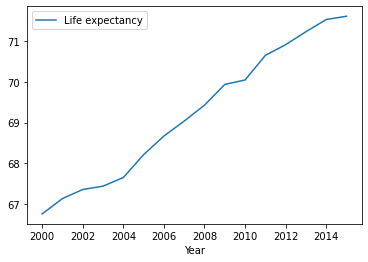

In [189]:
le_raw[['Life expectancy', 'Year']].groupby('Year').mean().plot()
plt.show()

In [190]:
le_raw_2014 = le_raw[le_raw.Year == 2014]
le_raw_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 2923
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            183 non-null    object 
 1   Year                               183 non-null    int64  
 2   Status                             183 non-null    object 
 3   Life expectancy                    183 non-null    float64
 4   Adult Mortality                    183 non-null    float64
 5   infant deaths                      183 non-null    int64  
 6   Alcohol                            182 non-null    float64
 7   percentage healthcare expenditure  183 non-null    float64
 8   Hepatitis B                        173 non-null    float64
 9   Measles                            183 non-null    int64  
 10  BMI                                181 non-null    float64
 11  under-five deaths                  183 non-null    int64 

## Preprocessing

In [191]:
le = pd.read_csv('Cleaned_data2014.csv')
le

,Country,Year,Status,Life expectancy,Mortality,Infant Mortality,Alcohol,percentage expenditure,Hepatitis B,Polio,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,62.55,7.14,56.26,0.01,9.53,62,58,62,0.1,614.22,33370804,0.476,10.0
1,Albania,2014,Developing,78.41,7.22,8.87,4.51,5.50,98,98,98,0.1,4578.63,2889104,0.761,14.2
2,Algeria,2014,Developing,75.11,4.71,21.42,0.01,6.55,95,95,95,0.1,5493.06,38923688,0.741,14.4
3,Angola,2014,Developing,60.04,9.45,62.02,8.33,2.43,64,68,64,2.0,5094.11,26941773,0.527,11.4
4,Antigua and Barbuda,2014,Developing,77.86,6.19,6.60,8.56,5.87,99,96,99,0.2,13501.58,92562,0.782,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela (Bolivarian Republic of),2014,Developing,72.85,6.19,15.23,6.47,5.78,78,79,78,0.1,16056.00,30042973,0.771,14.2
176,Viet Nam,2014,Developing,73.85,6.06,17.30,4.09,4.61,95,96,95,0.1,2545.42,91713850,0.675,12.5
177,Yemen,2014,Developing,67.38,5.96,45.51,0.01,4.84,73,67,73,0.1,1674.00,25823488,0.500,9.0
178,Zambia,2014,Developing,60.70,7.57,46.69,0.01,3.83,86,78,86,4.3,1762.43,15399793,0.570,12.5


In [192]:
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          180 non-null    object 
 1   Year                             180 non-null    int64  
 2   Status                           180 non-null    object 
 3   Life expectancy                  180 non-null    float64
 4    Mortality                       180 non-null    float64
 5   Infant Mortality                 180 non-null    float64
 6   Alcohol                          180 non-null    float64
 7   percentage expenditure           180 non-null    float64
 8   Hepatitis B                      180 non-null    int64  
 9   Polio                            180 non-null    int64  
 10  Diphtheria                       180 non-null    int64  
 11   HIV/AIDS                        180 non-null    float64
 12  GDP                   

In [193]:
le.reset_index(drop=True, inplace=True)
le

,Country,Year,Status,Life expectancy,Mortality,Infant Mortality,Alcohol,percentage expenditure,Hepatitis B,Polio,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,62.55,7.14,56.26,0.01,9.53,62,58,62,0.1,614.22,33370804,0.476,10.0
1,Albania,2014,Developing,78.41,7.22,8.87,4.51,5.50,98,98,98,0.1,4578.63,2889104,0.761,14.2
2,Algeria,2014,Developing,75.11,4.71,21.42,0.01,6.55,95,95,95,0.1,5493.06,38923688,0.741,14.4
3,Angola,2014,Developing,60.04,9.45,62.02,8.33,2.43,64,68,64,2.0,5094.11,26941773,0.527,11.4
4,Antigua and Barbuda,2014,Developing,77.86,6.19,6.60,8.56,5.87,99,96,99,0.2,13501.58,92562,0.782,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela (Bolivarian Republic of),2014,Developing,72.85,6.19,15.23,6.47,5.78,78,79,78,0.1,16056.00,30042973,0.771,14.2
176,Viet Nam,2014,Developing,73.85,6.06,17.30,4.09,4.61,95,96,95,0.1,2545.42,91713850,0.675,12.5
177,Yemen,2014,Developing,67.38,5.96,45.51,0.01,4.84,73,67,73,0.1,1674.00,25823488,0.500,9.0
178,Zambia,2014,Developing,60.70,7.57,46.69,0.01,3.83,86,78,86,4.3,1762.43,15399793,0.570,12.5


In [194]:
le.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', ' Mortality',
       'Infant Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [195]:
le.columns = ('Country', 'Year', 'Status', 'Life_expectancy', 'Mortality',
       'Infant_Mortality', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Polio',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population',
       'Income_composition_of_resources', 'Schooling')
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          180 non-null    object 
 1   Year                             180 non-null    int64  
 2   Status                           180 non-null    object 
 3   Life_expectancy                  180 non-null    float64
 4   Mortality                        180 non-null    float64
 5   Infant_Mortality                 180 non-null    float64
 6   Alcohol                          180 non-null    float64
 7   percentage_expenditure           180 non-null    float64
 8   Hepatitis_B                      180 non-null    int64  
 9   Polio                            180 non-null    int64  
 10  Diphtheria                       180 non-null    int64  
 11  HIV_AIDS                         180 non-null    float64
 12  GDP                   

In [196]:
df = le.copy()
country = le.Country

In [197]:
cols = ['Country', 'Year']
df = df.drop(cols, axis =1)
df.head()

,Status,Life_expectancy,Mortality,Infant_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,Polio,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,Developing,62.55,7.14,56.26,0.01,9.53,62,58,62,0.1,614.22,33370804,0.476,10.0
1,Developing,78.41,7.22,8.87,4.51,5.50,98,98,98,0.1,4578.63,2889104,0.761,14.2
2,Developing,75.11,4.71,21.42,0.01,6.55,95,95,95,0.1,5493.06,38923688,0.741,14.4
3,Developing,60.04,9.45,62.02,8.33,2.43,64,68,64,2.0,5094.11,26941773,0.527,11.4
4,Developing,77.86,6.19,6.60,8.56,5.87,99,96,99,0.2,13501.58,92562,0.782,13.9


In [198]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           180 non-null    object 
 1   Life_expectancy                  180 non-null    float64
 2   Mortality                        180 non-null    float64
 3   Infant_Mortality                 180 non-null    float64
 4   Alcohol                          180 non-null    float64
 5   percentage_expenditure           180 non-null    float64
 6   Hepatitis_B                      180 non-null    int64  
 7   Polio                            180 non-null    int64  
 8   Diphtheria                       180 non-null    int64  
 9   HIV_AIDS                         180 non-null    float64
 10  GDP                              180 non-null    float64
 11  Population                       180 non-null    int64  
 12  Income_composition_of_

## Visualization

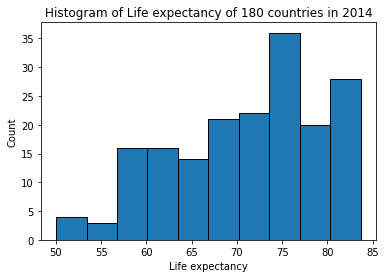

In [199]:
le['Life_expectancy'].plot.hist(edgecolor='black')
plt.xlabel("Life expectancy")
plt.ylabel("Count")
plt.title("Histogram of Life expectancy of 180 countries in 2014")
plt.savefig('le2014.png')

Text(0.5, 1.0, 'Life Expectancy vs Income composition of resources')

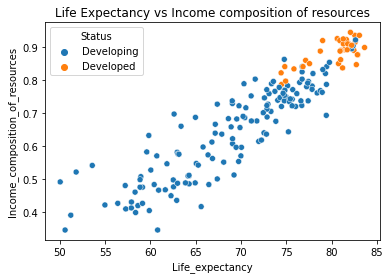

In [200]:
sns.scatterplot(data=le, x='Life_expectancy', y='Income_composition_of_resources', hue='Status')
plt.title('Life Expectancy vs Income composition of resources')

Text(0.5, 1.0, 'Life Expectancy vs Mortality')

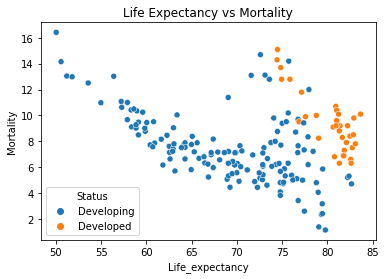

In [201]:
sns.scatterplot(data=le, x='Life_expectancy', y='Mortality', hue='Status')
plt.title('Life Expectancy vs Mortality')

## Transformation

In [202]:
df = pd.get_dummies(df, drop_first=False)
df

,Life_expectancy,Mortality,Infant_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,Polio,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Status_Developed,Status_Developing
0,62.55,7.14,56.26,0.01,9.53,62,58,62,0.1,614.22,33370804,0.476,10.0,0,1
1,78.41,7.22,8.87,4.51,5.50,98,98,98,0.1,4578.63,2889104,0.761,14.2,0,1
2,75.11,4.71,21.42,0.01,6.55,95,95,95,0.1,5493.06,38923688,0.741,14.4,0,1
3,60.04,9.45,62.02,8.33,2.43,64,68,64,2.0,5094.11,26941773,0.527,11.4,0,1
4,77.86,6.19,6.60,8.56,5.87,99,96,99,0.2,13501.58,92562,0.782,13.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,72.85,6.19,15.23,6.47,5.78,78,79,78,0.1,16056.00,30042973,0.771,14.2,0,1
176,73.85,6.06,17.30,4.09,4.61,95,96,95,0.1,2545.42,91713850,0.675,12.5,0,1
177,67.38,5.96,45.51,0.01,4.84,73,67,73,0.1,1674.00,25823488,0.500,9.0,0,1
178,60.70,7.57,46.69,0.01,3.83,86,78,86,4.3,1762.43,15399793,0.570,12.5,0,1


In [203]:
y = df.Life_expectancy
X = df.drop(columns=['Life_expectancy'])

# Split data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 1, stratify = None)

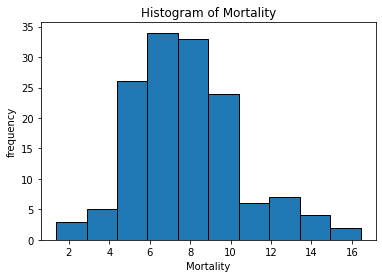

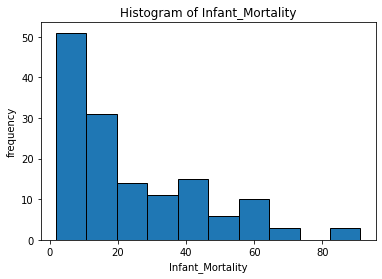

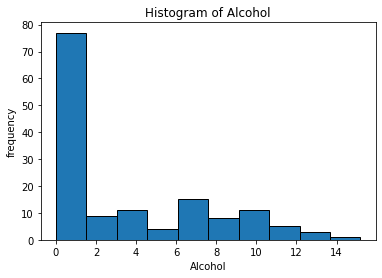

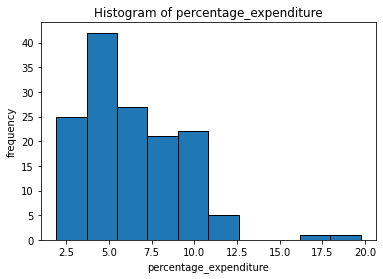

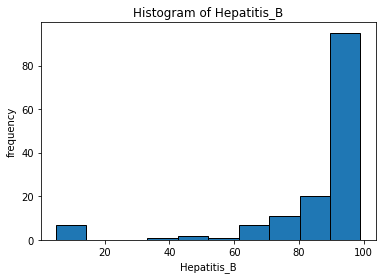

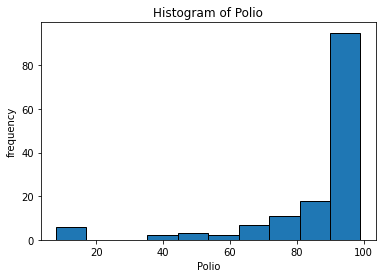

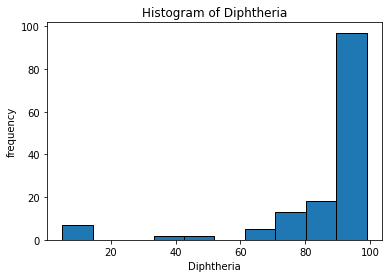

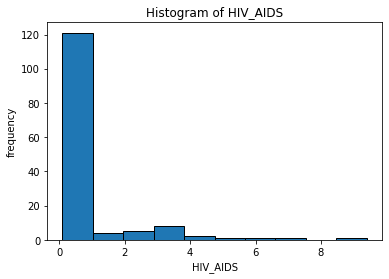

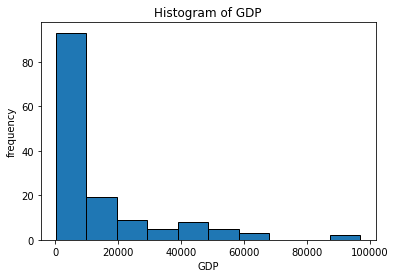

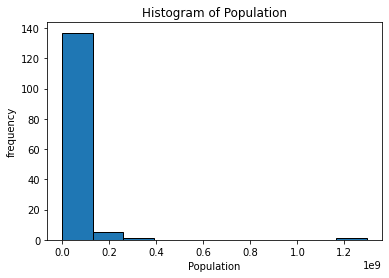

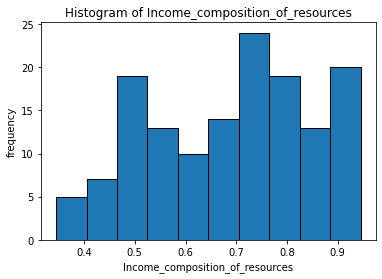

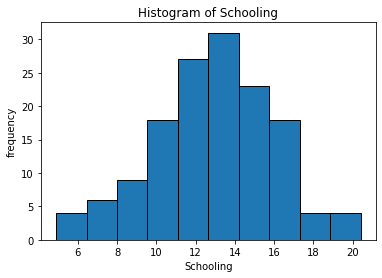

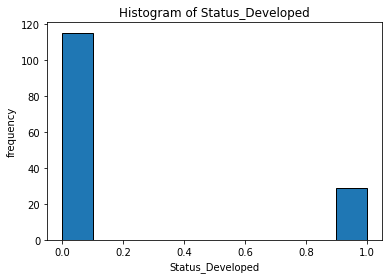

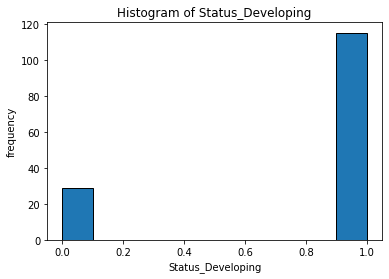

In [204]:
 for col in X_train.columns: 
  X_train[col].plot.hist(edgecolor='black')
  plt.xlabel(f"{col}")
  plt.ylabel("frequency")
  plt.title(f"Histogram of {col}")
  plt.show()

In [205]:
X_train.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Mortality,0.662028,0.670685
Infant_Mortality,1.072702,0.411342
Alcohol,0.865075,-0.628408
percentage_expenditure,1.138425,2.788480
Hepatitis_B,-2.707730,7.143542
Polio,-2.587091,6.762665
Diphtheria,-2.691773,6.898616
HIV_AIDS,3.334769,12.849662
GDP,2.067335,4.323103
Population,9.332959,99.502029


In [206]:
X_test.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Mortality,0.183420,0.041994
Infant_Mortality,1.152733,0.119790
Alcohol,1.066342,-0.098507
percentage_expenditure,0.493680,0.035494
Hepatitis_B,-1.493256,1.341647
Polio,-1.645258,2.404971
Diphtheria,-1.592770,1.614934
HIV_AIDS,2.614206,5.739807
GDP,2.748102,8.260432
Population,5.777886,34.088606


In [207]:
from scipy import stats
from scipy.stats import norm, skew

In [208]:
def transformation(var):
  X_train[var] = np.log1p(X_train[var])

  sns.distplot(X_train[var] , fit=norm);

  (mu, sigma) = norm.fit(X_train[var])
  #print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

  #Plot the distribution
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
  plt.ylabel('Frequency')
  plt.title(f'{var} distribution')
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


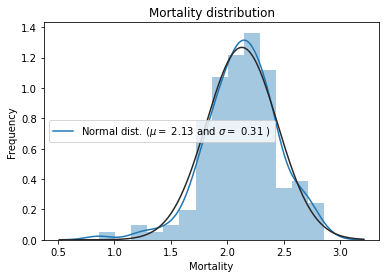

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


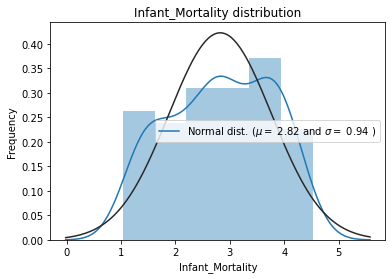

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


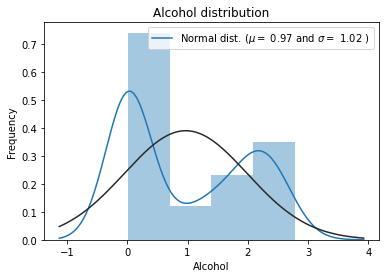

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


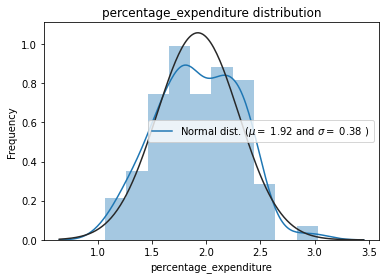

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


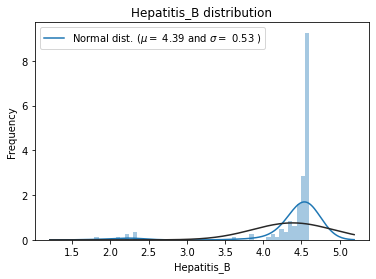

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


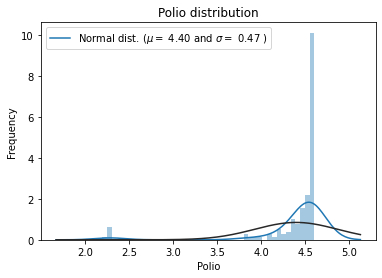

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


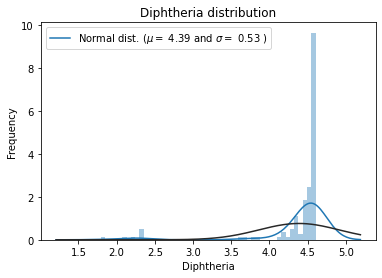

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


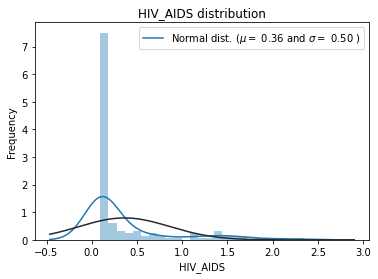

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


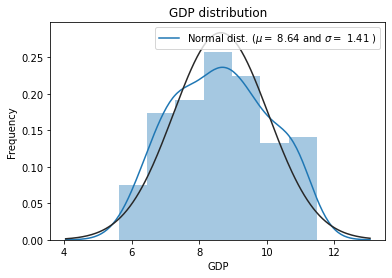

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


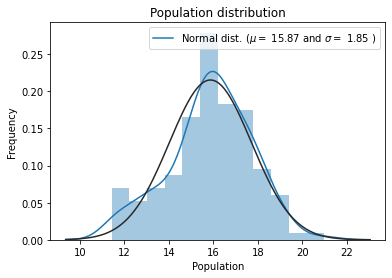

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


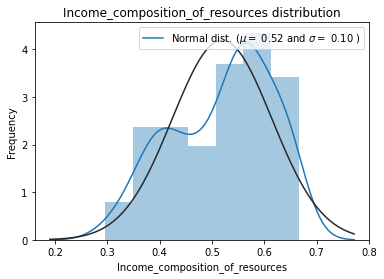

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


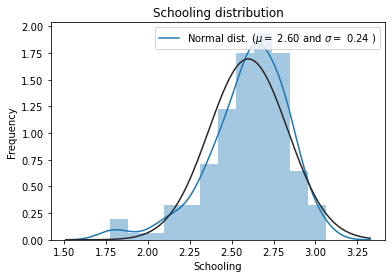

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


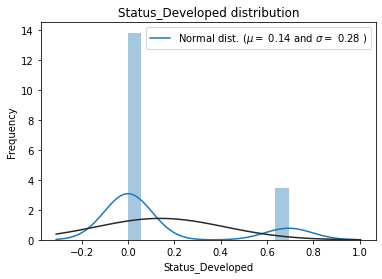

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


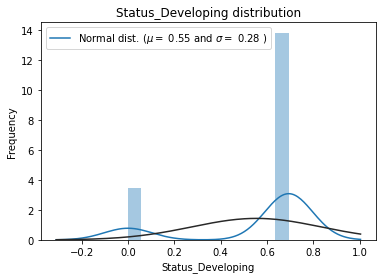

In [209]:
for col in X_train.columns:
  transformation(col)

In [210]:
X_train

,Mortality,Infant_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,Polio,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Status_Developed,Status_Developing
153,2.322388,1.156881,2.116256,2.480731,4.219508,4.595120,4.595120,0.095310,11.002456,16.087235,0.645007,2.821379,0.693359,0.000000
47,1.955860,3.378611,1.934416,1.909543,4.499810,2.302585,4.521789,0.262364,8.796313,16.134479,0.537662,2.653242,0.000000,0.693359
84,1.968510,3.609836,0.009950,1.865629,4.532599,4.543295,4.532599,1.360977,7.288395,17.659256,0.435671,2.493205,0.000000,0.693359
117,2.186051,1.229641,1.954445,2.336020,4.595120,4.543295,4.543295,0.095310,11.482674,15.452025,0.665262,2.928524,0.693359,0.000000
178,2.148268,3.864722,0.009950,1.574846,4.465908,4.369448,4.465908,1.667707,7.475016,16.549865,0.451076,2.602690,0.000000,0.693359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2.090629,2.791165,2.395164,1.750937,4.605170,4.605170,4.605170,0.095310,9.194649,12.091268,0.544067,2.646175,0.000000,0.693359
137,1.483875,2.222459,0.086178,1.829376,4.595120,4.595120,4.595120,0.095310,10.105007,17.246804,0.610309,2.821379,0.000000,0.693359
72,1.987874,1.111858,2.134166,2.222459,4.532599,2.302585,2.302585,0.095310,10.907381,12.698898,0.649718,2.995732,0.693359,0.000000
140,2.186051,2.598979,0.009950,1.747459,4.605170,4.605170,4.605170,0.095310,9.628339,11.422563,0.568717,2.653242,0.000000,0.693359


In [211]:
for col in X_test.columns:
  X_test[col] = np.log1p(X_test[col])
  (mu, sigma) = norm.fit(X_test[col])

X_test.head()

,Mortality,Infant_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,Polio,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Status_Developed,Status_Developing
116,2.638343,4.423169,0.009950,1.470176,3.912023,3.912023,3.912023,1.589235,8.039154,18.988293,0.419368,2.397895,0.000000,0.693359
112,2.230014,1.534714,0.009950,2.448416,4.532599,4.574711,4.574711,0.095310,10.876188,16.640752,0.653886,2.949688,0.693359,0.000000
99,2.484907,4.231349,0.009950,1.701105,4.304065,4.317488,4.304065,0.955511,6.744389,16.644847,0.357674,2.219203,0.000000,0.693359
161,2.110213,2.467252,0.009950,1.838961,2.197225,4.418841,2.197225,0.095310,8.379135,11.523113,0.539996,2.727853,0.000000,0.693359
35,2.094330,2.360854,1.913977,1.754404,4.605170,4.605170,4.605170,0.095310,8.940776,21.039433,0.544067,2.646175,0.000000,0.693359


## **Linear Regression Model**

In [212]:
import statsmodels.api as sma
import sklearn.metrics as sm

### Model 1: Run Linear Regression on all variables

In [213]:
# Multiple Linear Regression 
model = sma.OLS(y_train, X_train).fit() ## sma.OLS(output, input)

In [214]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     222.7
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           4.79e-82
Time:                        07:22:46   Log-Likelihood:                -279.08
No. Observations:                 144   AIC:                             586.2
Df Residuals:                     130   BIC:                             627.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Mortality                          -4.5628      0.657     -6.940      0.000      -5.864      -3.262
Infant_Mortality                   -4.3534      0.493     -8.835      0.000      -5.328      -3.379
Alcohol                             0.4459      0.208      2.141      0.034       0.034       0.858
percentage_expenditure              0.8775      0.494      1.777      0.078      -0.100       1.855
Hepatitis_B                        -0.8401      0.435     -1.930      0.056      -1.701       0.021
Polio                              -0.2172      0.381     -0.570      0.570      -0.971       0.537
Diphtheria                          0.9882      0.464      2.129      0.035       0.070       1.906
HIV_AIDS                           -3.6241      0.439     -8.253      0.000      -4.493      -2.755
GDP                                 0.1313      0.355      0.369      0.713      -0.572       0.835
Population                          0.0496      0.083      0.597      0.551      -0.115       0.214
Income_composition_of_resources    15.2946      7.615      2.008      0.047       0.229      30.361
Schooling                           0.7623      1.286      0.593      0.554      -1.782       3.306
Status_Developed                  117.2403      7.767     15.094      0.000     101.873     132.607
Status_Developing                 116.2874      7.582     15.337      0.000     101.287     131.288
==============================================================================
Omnibus:                        2.431   Durbin-Watson:                   2.289
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                2.425
Skew:                          -0.309   Prob(JB):                        0.297
Kurtosis:                       2.849   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [215]:
# Make predictions on test data
y_pred = model.predict(X_test)

In [216]:
y_pred

116    54.839117
112    80.463060
99     57.477503
161    72.908045
35     75.080689
54     62.728611
69     61.996404
19     69.460831
110    63.432749
127    82.577383
106    76.693315
107    71.482084
11     80.831097
108    55.437068
4      77.235368
124    70.956030
14     77.528305
120    75.329390
29     68.212523
123    74.111761
158    73.993863
42     81.142670
51     56.159622
174    69.514426
53     78.272515
40     77.060524
48     75.062456
66     59.562999
159    67.475024
31     81.293573
16     74.634598
94     81.797155
56     82.066610
95     64.997169
5      75.729883
167    73.393535
dtype: float64

In [217]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 3)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 3)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 3)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 3))

Mean absolute error = 1.368
Mean squared error = 2.885
Median absolute error = 1.155
Explain variance score = 0.957
R2 score = 0.957


### Model 2: Run Linear Regression on statistically significant variables

##### From the above summary, the variables that are not statistical significant are: 


1. 'percentage_expenditure' 
2. 'Hepatitis_B' 
3. 'Polio'
4. 'GDP'
5. 'Population'
6. 'Schooling' 

In [218]:
insignificant_cols = ['percentage_expenditure', 'Hepatitis_B', 'Polio', 'GDP', 'Population', 'Schooling']

X2 = X.drop(columns=insignificant_cols)
X2_train = X_train.drop(columns=insignificant_cols)
X2_test = X_test.drop(columns=insignificant_cols)

In [219]:
print('Independent variables: ', X2.columns)

Independent variables:  Index(['Mortality', 'Infant_Mortality', 'Alcohol', 'Diphtheria', 'HIV_AIDS',
       'Income_composition_of_resources', 'Status_Developed',
       'Status_Developing'],
      dtype='object')


In [220]:
model2 = sma.OLS(y_train, X2_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     403.7
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           1.13e-87
Time:                        07:22:47   Log-Likelihood:                -283.87
No. Observations:                 144   AIC:                             583.7
Df Residuals:                     136   BIC:                             607.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Mortality                          -4.6102      0.630     -7.322      0.000      -5.855      -3.365
Infant_Mortality                   -4.3365      0.482     -8.996      0.000      -5.290      -3.383
Alcohol                             0.5228      0.201      2.605      0.010       0.126       0.920
Diphtheria                          0.3211      0.294      1.092      0.277      -0.260       0.902
HIV_AIDS                           -3.4462      0.403     -8.543      0.000      -4.244      -2.648
Income_composition_of_resources    18.5895      4.368      4.256      0.000       9.951      27.228
Status_Developed                  120.7511      5.821     20.743      0.000     109.239     132.263
Status_Developing                 119.1627      5.802     20.539      0.000     107.689     130.636
==============================================================================
Omnibus:                        4.056   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.985
Skew:                          -0.406   Prob(JB):                        0.136
Kurtosis:                       2.924   Cond. No.                         355.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
y2_pred = model2.predict(X2_test)

In [222]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y2_pred), 3)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y2_pred), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y2_pred), 3)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y2_pred), 3)) 
print("R2 score =", round(sm.r2_score(y_test, y2_pred), 3))

Mean absolute error = 1.475
Mean squared error = 3.25
Median absolute error = 1.399
Explain variance score = 0.951
R2 score = 0.951


### Model 3: Run Linear Regression on variables with high correlations with targeted variable 


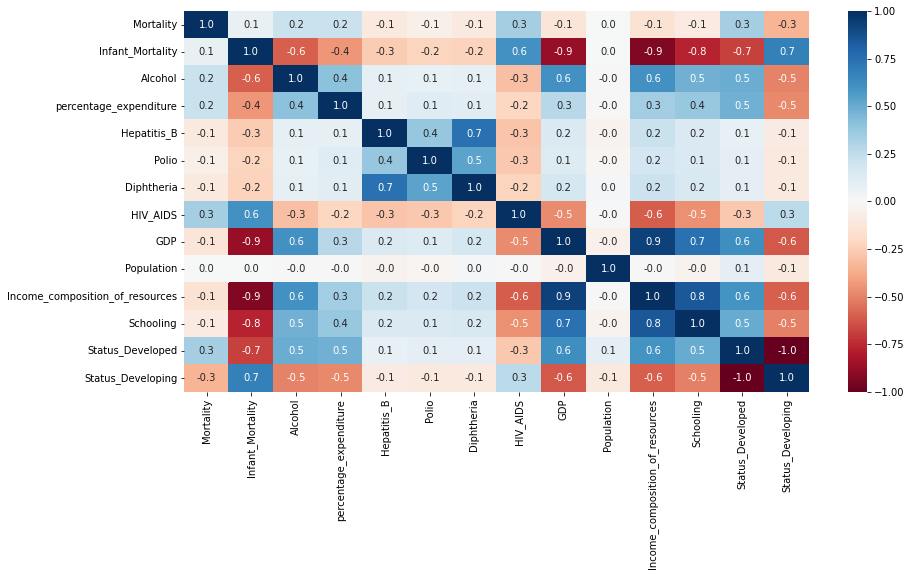

In [223]:
cor_map = X_train.corr()

plt.figure(figsize=(14,7))
sns.heatmap(cor_map, annot=True, fmt=".1f",vmin=-1,vmax=1, cmap='RdBu');

In [224]:
train = X_train.copy()
train["Life_expectancy"] = y_train
train.corr(method = "pearson")["Life_expectancy"].sort_values(ascending=False, key=abs)

Life_expectancy                    1.000000
Infant_Mortality                  -0.930508
Income_composition_of_resources    0.917236
GDP                                0.843398
Schooling                          0.759171
HIV_AIDS                          -0.748277
Status_Developing                 -0.562744
Status_Developed                   0.562744
Alcohol                            0.553946
percentage_expenditure             0.390019
Mortality                         -0.289338
Diphtheria                         0.260493
Hepatitis_B                        0.254861
Polio                              0.237752
Population                         0.015108
Name: Life_expectancy, dtype: float64

Variables have high correlation with 'Life_expectancy' (absolutue value > 0.6):


1. 'Infant_Mortality'
2. 'Income_composition_of_resources'
3. 'GDP'
4. 'Schooling'
5. 'HIV_AIDS'

Among these variables, we can notice that 'Income_composition_of_resources' is highly correlated with 'GDP' (0.9) and Infant_Mortality' (-0.9). It also has comparably high correlations with the remaining two variables, which are 0.8 with 'Schooling' and -0.6 with 'HIV_AIDS'.

Therefore, we decide to remove 'Income_composition_of_resources' in our model to avoid multicollinearity.

In [225]:
high_corr = ['Schooling', 'HIV_AIDS', 'GDP']

X3 = X[high_corr]
X3_train = X_train[high_corr]
X3_test = X_test[high_corr]

In [226]:
model3 = sma.OLS(y_train, X3_train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life_expectancy   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.792e+04
Date:                Tue, 29 Nov 2022   Prob (F-statistic):                   8.17e-182
Time:                        07:22:48   Log-Likelihood:                         -391.16
No. Observations:                 144   AIC:                                      788.3
Df Residuals:                     141   BIC:                                      797.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Schooling     19.5098      1.147     17.013      0.000      17.243      21.777
HIV_AIDS      -4.2959      0.631     -6.813      0.000      -5.542      -3.049
GDP            2.5174      0.334      7.548      0.000       1.858       3.177
==============================================================================
Omnibus:                       20.232   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.599
Skew:                           0.689   Prob(JB):                     5.06e-08
Kurtosis:                       4.924   Cond. No.                         36.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
y3_pred = model3.predict(X3_test)

In [228]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y3_pred), 3)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y3_pred), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y3_pred), 3)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y3_pred), 3)) 
print("R2 score =", round(sm.r2_score(y_test, y3_pred), 3))

Mean absolute error = 2.502
Mean squared error = 9.369
Median absolute error = 2.252
Explain variance score = 0.86
R2 score = 0.86


### **Stepwise Regression** 
#### Model 4: Run Linear regression on variables selected by using Stepwise - Backwards elimination method


In [229]:
x = ['Mortality', 'Infant_Mortality', 'Alcohol', 'percentage_expenditure',
     'Hepatitis_B', 'Polio', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population',
     'Income_composition_of_resources', 'Schooling', 'Status_Developed', 
     'Status_Developing']

def stepwise(x):
    x_train = X_train[x]
    results = sma.OLS(y_train, x_train).fit()

    pvalue = results.pvalues.values
    var = results.pvalues.index

    max_p = pvalue.max()
    if max_p > 0.05:
      index = np.where(pvalue == max_p)
      removed = var[index[0]]
      x.remove(removed[0])
      stepwise(x)

    else:
      print(results.summary())
      print('Selected variables: ', x)

stepwise(x)

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     362.5
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           2.75e-87
Time:                        07:22:48   Log-Likelihood:                -281.57
No. Observations:                 144   AIC:                             581.1
Df Residuals:                     135   BIC:                             607.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Mortality 

In [230]:
X4 = X[x]
X4_train = X_train[x]
X4_test = X_test[x]

In [231]:
model4 = sma.OLS(y_train, X4_train).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     362.5
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           2.75e-87
Time:                        07:22:48   Log-Likelihood:                -281.57
No. Observations:                 144   AIC:                             581.1
Df Residuals:                     135   BIC:                             607.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Mortality                          -4.5289      0.623     -7.267      0.000      -5.761      -3.296
Infant_Mortality                   -4.4599      0.480     -9.295      0.000      -5.409      -3.511
Alcohol                             0.5113      0.198      2.578      0.011       0.119       0.903
Hepatitis_B                        -0.8997      0.430     -2.093      0.038      -1.750      -0.050
Diphtheria                          0.9584      0.421      2.278      0.024       0.126       1.791
HIV_AIDS                           -3.5618      0.402     -8.854      0.000      -4.357      -2.766
Income_composition_of_resources    17.8563      4.329      4.125      0.000       9.295      26.418
Status_Developed                  123.1396      5.863     21.005      0.000     111.545     134.734
Status_Developing                 121.7366      5.861     20.769      0.000     110.145     133.329
==============================================================================
Omnibus:                        5.019   Durbin-Watson:                   2.286
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                4.773
Skew:                          -0.444   Prob(JB):                       0.0920
Kurtosis:                       3.076   Cond. No.                         453.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
y4_pred = model4.predict(X4_test)

In [233]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y4_pred), 3)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y4_pred), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y4_pred), 3)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y4_pred), 3)) 
print("R2 score =", round(sm.r2_score(y_test, y4_pred), 3))

Mean absolute error = 1.455
Mean squared error = 3.117
Median absolute error = 1.405
Explain variance score = 0.954
R2 score = 0.953


## **Predict Life expectancy of US in 2021**

In [234]:
us2021 = pd.read_csv('US2021.csv')
us2021

,Country,Year,Status,Life expectancy,Mortality,infant mortality,Alcohol,percentage healthcare expenditure,Hepatitis B,Polio,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,United States,2021,Developed,78.99,8,6,3.6,19.7,91,93,80,0.06,"69,287.54","331,893,745",0.921,13


In [235]:
us2021.columns = ('Country', 'Year', 'Status', 'Life_expectancy', 'Mortality',
       'Infant_Mortality', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Polio',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population',
       'Income_composition_of_resources', 'Schooling')

In [236]:
us2021['Status_Developed'] = 1
us2021['Status_Developing'] = 0
us2021

,Country,Year,Status,Life_expectancy,Mortality,Infant_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,Polio,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Status_Developed,Status_Developing
0,United States,2021,Developed,78.99,8,6,3.6,19.7,91,93,80,0.06,"69,287.54","331,893,745",0.921,13,1,0


In [237]:
us2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1 non-null      object 
 1   Year                             1 non-null      int64  
 2   Status                           1 non-null      object 
 3   Life_expectancy                  1 non-null      float64
 4   Mortality                        1 non-null      int64  
 5   Infant_Mortality                 1 non-null      int64  
 6   Alcohol                          1 non-null      float64
 7   percentage_expenditure           1 non-null      float64
 8   Hepatitis_B                      1 non-null      int64  
 9   Polio                            1 non-null      int64  
 10  Diphtheria                       1 non-null      int64  
 11  HIV_AIDS                         1 non-null      float64
 12  GDP                       

In [238]:
us2021.GDP = 69287.54
us2021.Population = 331893745

In [239]:
y_us2021 = us2021.Life_expectancy
X_us2021 = us2021.drop(columns=['Life_expectancy', 'Country', 'Year', 'Status'])

In [240]:
X_us2021 = np.log1p(X_us2021)
(mu, sigma) = norm.fit(X_us2021)

In [241]:
X2_us2021 = X_us2021.drop(columns=insignificant_cols)
X3_us2021 = X_us2021[high_corr]
X4_us2021 = X_us2021[x]

In [242]:
pred1 = model.predict(X_us2021)
pred2 = model2.predict(X2_us2021)
pred3 = model3.predict(X3_us2021)
pred4 = model4.predict(X4_us2021)

In [243]:
print('Linear regression on all variables: ', round(pred1[0], 3))
print('Linear regression on statistically significant variables: ', round(pred2[0], 3))
print('Linear regression on high correlated variables: ', round(pred3[0], 3))
print('Linear regression on selected variables by Stepwise method: ', round(pred4[0], 3))

Linear regression on all variables:  79.887
Linear regression on statistically significant variables:  79.274
Linear regression on high correlated variables:  79.296
Linear regression on selected variables by Stepwise method:  79.098


In [244]:
print(y_us2021)

0    78.99
Name: Life_expectancy, dtype: float64


## **Using Model 4 to predict the life expectancy of all countries in 2019**

In [245]:
le2019 = pd.read_csv('Life_Exp_2019.csv')
le2019

,Country,Year,Life expectancy,Mortality,Infant Mortality,Alcohol,Hepatitis B,Diphtheria,HIV/AIDS,Income composition of resources,Status
0,Afghanistan,2019,63.2,6.29,46.71,0.01,72,72,0.1,0.432,Developing
1,Albania,2019,78.0,8.08,8.72,4.40,99,99,0.1,0.727,Developing
2,Algeria,2019,77.1,4.72,19.63,0.59,91,91,0.1,0.743,Developing
3,Angola,2019,63.1,7.98,51.25,5.84,53,57,1.8,0.607,Developing
4,Antigua and Barbuda,2019,76.5,6.42,5.35,11.88,99,95,9.8,0.816,Developing
...,...,...,...,...,...,...,...,...,...,...,...
176,Venezuela (Bolivarian Republic of),2019,73.9,7.12,15.76,2.51,64,64,0.1,0.681,Developing
177,Viet Nam,2019,73.7,6.38,16.65,3.41,89,89,0.1,0.624,Developing
178,Yemen,2019,66.6,5.98,46.52,0.02,73,73,0.1,0.402,Developing
179,Zambia,2019,62.5,6.32,44.19,3.82,88,88,11.1,0.541,Developing


In [246]:
le2019.columns = ('Country', 'Year', 'Life_expectancy', 'Mortality',
       'Infant_Mortality', 'Alcohol', 'Hepatitis_B','Diphtheria', 'HIV_AIDS',
       'Income_composition_of_resources', 'Status')

In [247]:
cols = ['Country', 'Year']
le2019 = le2019.drop(cols, axis =1)
le2019.head()

,Life_expectancy,Mortality,Infant_Mortality,Alcohol,Hepatitis_B,Diphtheria,HIV_AIDS,Income_composition_of_resources,Status
0,63.2,6.29,46.71,0.01,72,72,0.1,0.432,Developing
1,78.0,8.08,8.72,4.40,99,99,0.1,0.727,Developing
2,77.1,4.72,19.63,0.59,91,91,0.1,0.743,Developing
3,63.1,7.98,51.25,5.84,53,57,1.8,0.607,Developing
4,76.5,6.42,5.35,11.88,99,95,9.8,0.816,Developing


In [248]:
le2019 = pd.get_dummies(le2019, drop_first=False)
y_le2019 = le2019['Life_expectancy']
X_le2019 = le2019.drop(columns=['Life_expectancy'])

In [249]:
X_le2019 = np.log1p(X_le2019)
(mu, sigma) = norm.fit(X_le2019)
le2019

,Life_expectancy,Mortality,Infant_Mortality,Alcohol,Hepatitis_B,Diphtheria,HIV_AIDS,Income_composition_of_resources,Status_Developed,Status_Developing
0,63.2,6.29,46.71,0.01,72,72,0.1,0.432,0,1
1,78.0,8.08,8.72,4.40,99,99,0.1,0.727,0,1
2,77.1,4.72,19.63,0.59,91,91,0.1,0.743,0,1
3,63.1,7.98,51.25,5.84,53,57,1.8,0.607,0,1
4,76.5,6.42,5.35,11.88,99,95,9.8,0.816,0,1
...,...,...,...,...,...,...,...,...,...,...
176,73.9,7.12,15.76,2.51,64,64,0.1,0.681,0,1
177,73.7,6.38,16.65,3.41,89,89,0.1,0.624,0,1
178,66.6,5.98,46.52,0.02,73,73,0.1,0.402,0,1
179,62.5,6.32,44.19,3.82,88,88,11.1,0.541,0,1


In [250]:
X4_le2019 = X_le2019[x]
le2019_pred4 = model4.predict(X4_le2019)

In [251]:
print("R2 score =", round(sm.r2_score(y_le2019, le2019_pred4), 3))
print("Mean absolute error =", round(sm.mean_absolute_error(y_le2019, le2019_pred4), 3)) 
print("Mean squared error =", round(sm.mean_squared_error(y_le2019, le2019_pred4), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(y_le2019, le2019_pred4), 3)) 
print("Explain variance score =", round(sm.explained_variance_score(y_le2019, le2019_pred4), 3)) 

R2 score = 0.634
Mean absolute error = 3.198
Mean squared error = 18.176
Median absolute error = 2.278
Explain variance score = 0.703


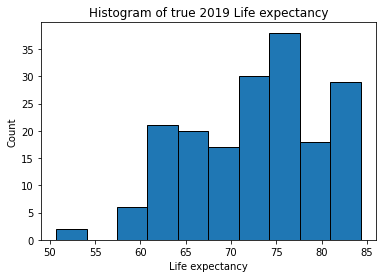

In [252]:
le2019['Life_expectancy'].plot.hist(edgecolor='black')
plt.xlabel("Life expectancy")
plt.ylabel("Count")
plt.title("Histogram of true 2019 Life expectancy")
plt.savefig("2019_true.png")

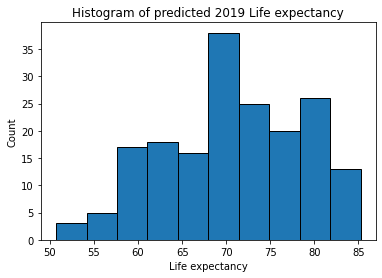

In [253]:
le2019_pred4.plot.hist(edgecolor='black')
plt.xlabel("Life expectancy")
plt.ylabel("Count")
plt.title("Histogram of predicted 2019 Life expectancy")
plt.savefig("2019_predicted.png")